## Hands-on Activity 9.2 Customized Visualizations using Seaborn

## Instructions:

Create a Python notebook to answer all shown procedures, exercises and analysis in this section.

## Resources:

Download the following datasets: fb_stock_prices_2018.csv Download fb_stock_prices_2018.csv, earthquakes-1.csvDownload earthquakes-1.csv

## Procedures:

9.4 Introduction to Seaborn
9.5 Formatting Plots
9.6 Customizing Visualizations

## Data Analysis:

Provide comments on output from the procedures.

## Supplementary Activity:

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.

Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)

Fill in the area between the bounds in the plot from exercise #2.

Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.

Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
-Disappointing user growth announced after close on July 25, 2018
-Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
-FTC launches investigation on March 20, 2018

Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

## Summary/Conclusion:

Provide a summary of your learnings and the conclusion for this activity.

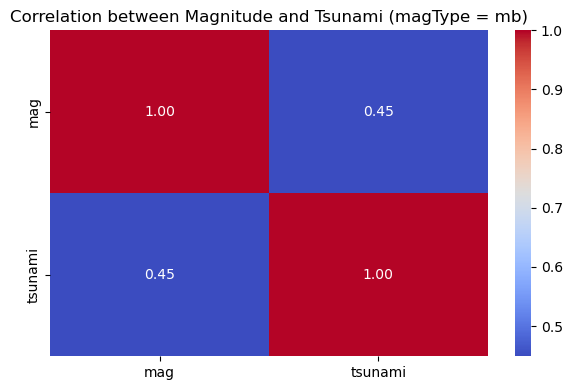

In [4]:
#Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
quake = pd.read_csv('earthquakes-1.csv')

# Filter for magType 'mb'
mb_quakes = quake[quake['magType'] == 'mb']

# Drop rows with missing values in 'mag' or 'tsunami'
mb_quakes = mb_quakes.dropna(subset=['mag', 'tsunami'])

# Convert tsunami to numeric (in case it's not already)
mb_quakes['tsunami'] = pd.to_numeric(mb_quakes['tsunami'], errors='coerce')

# Select only the relevant columns
corr_data = mb_quakes[['mag', 'tsunami']]

# Calculate correlation matrix
corr_matrix = corr_data.corr()

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation between Magnitude and Tsunami (magType = mb)')
plt.tight_layout()
plt.show()


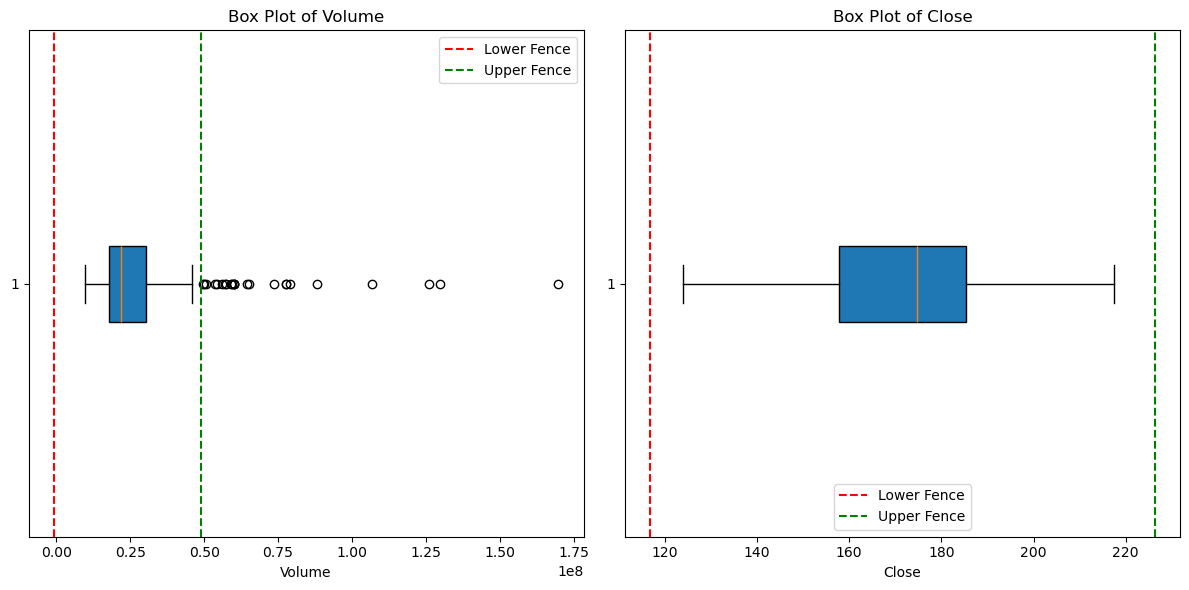

In [6]:
#Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)
fb = pd.read_csv('fb_stock_prices_2018.csv', parse_dates=['date'])

# Data columns to analyze
columns = ['volume', 'close']

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Loop through each column to plot boxplot and draw Tukey fences
for i, col in enumerate(columns):
    data = fb[col].dropna()
    
    # Calculate Q1, Q3, IQR
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    
    # Tukey bounds
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    # Create boxplot
    axes[i].boxplot(data, vert=False, patch_artist=True)
    axes[i].set_title(f'Box Plot of {col.capitalize()}')
    
    # Draw Tukey fence lines
    axes[i].axvline(lower, color='red', linestyle='--', label='Lower Fence')
    axes[i].axvline(upper, color='green', linestyle='--', label='Upper Fence')
    
    axes[i].legend()
    axes[i].set_xlabel(col.capitalize())

plt.tight_layout()
plt.show()


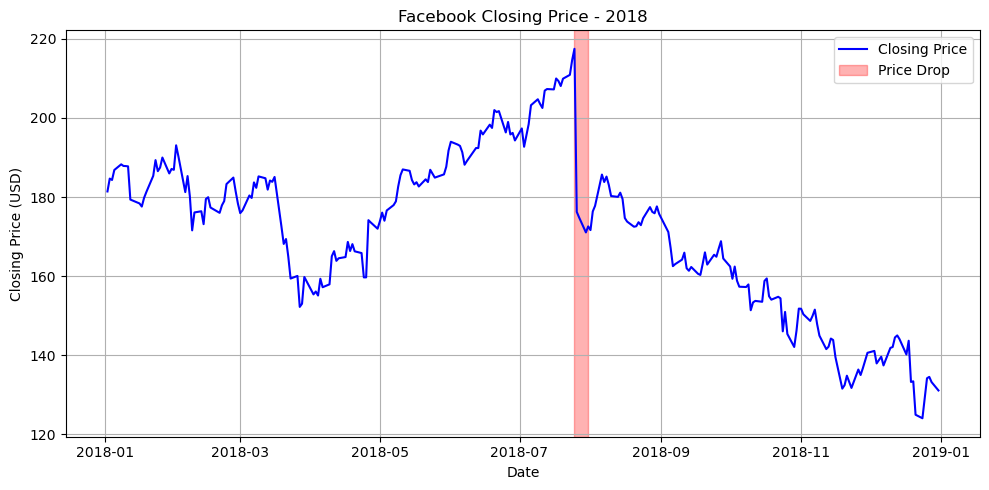

In [8]:
fb = pd.read_csv('fb_stock_prices_2018.csv', parse_dates=['date'])

# Sort by date
fb = fb.sort_values('date')

# Plot closing price
plt.figure(figsize=(10, 5))
plt.plot(fb['date'], fb['close'], label='Closing Price', color='blue')

# Highlight the decline period using axvspan
plt.axvspan(pd.to_datetime('2018-07-25'), pd.to_datetime('2018-07-31'), 
            color='red', alpha=0.3, label='Price Drop')

plt.title("Facebook Closing Price - 2018")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

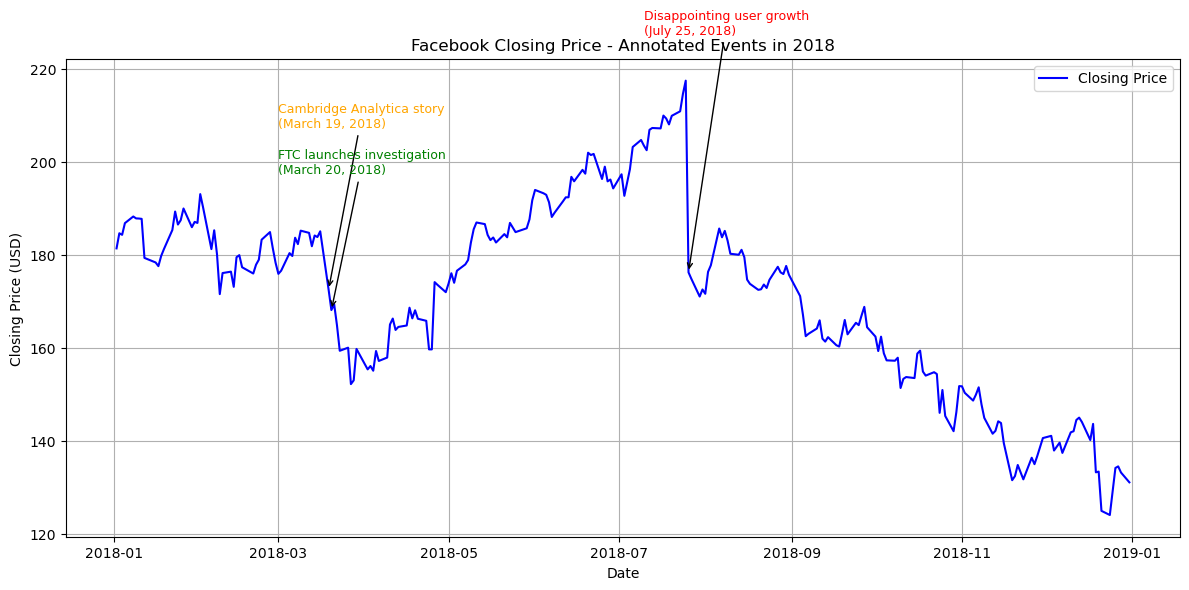

In [26]:
fb = pd.read_csv('fb_stock_prices_2018.csv', parse_dates=['date'])
fb = fb.sort_values('date')

# Plot closing price
plt.figure(figsize=(12, 6))
plt.plot(fb['date'], fb['close'], label='Closing Price', color='blue')

# Annotate July 25, 2018 - Disappointing user growth
plt.annotate(
    'Disappointing user growth\n(July 25, 2018)',
    xy=(pd.to_datetime('2018-07-26'), fb.loc[fb['date'] == pd.to_datetime('2018-07-26'), 'close'].values[0]),
    xytext=(pd.to_datetime('2018-07-10'), fb['close'].max() + 10),
    arrowprops=dict(facecolor='red', arrowstyle='->'),
    fontsize=9,
    color='red'
)

# Annotate March 19, 2018 - Cambridge Analytica story
plt.annotate(
    'Cambridge Analytica story\n(March 19, 2018)',
    xy=(pd.to_datetime('2018-03-19'), fb.loc[fb['date'] == pd.to_datetime('2018-03-19'), 'close'].values[0]),
    xytext=(pd.to_datetime('2018-03-01'), fb['close'].max() - 10),
    arrowprops=dict(facecolor='orange', arrowstyle='->'),
    fontsize=9,
    color='orange'
)

# Annotate March 20, 2018 - FTC investigation
plt.annotate(
    'FTC launches investigation\n(March 20, 2018)',
    xy=(pd.to_datetime('2018-03-20'), fb.loc[fb['date'] == pd.to_datetime('2018-03-20'), 'close'].values[0]),
    xytext=(pd.to_datetime('2018-03-01'), fb['close'].max() - 20),
    arrowprops=dict(facecolor='green', arrowstyle='->'),
    fontsize=9,
    color='green'
)

# plot 
plt.title("Facebook Closing Price - Annotated Events in 2018")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

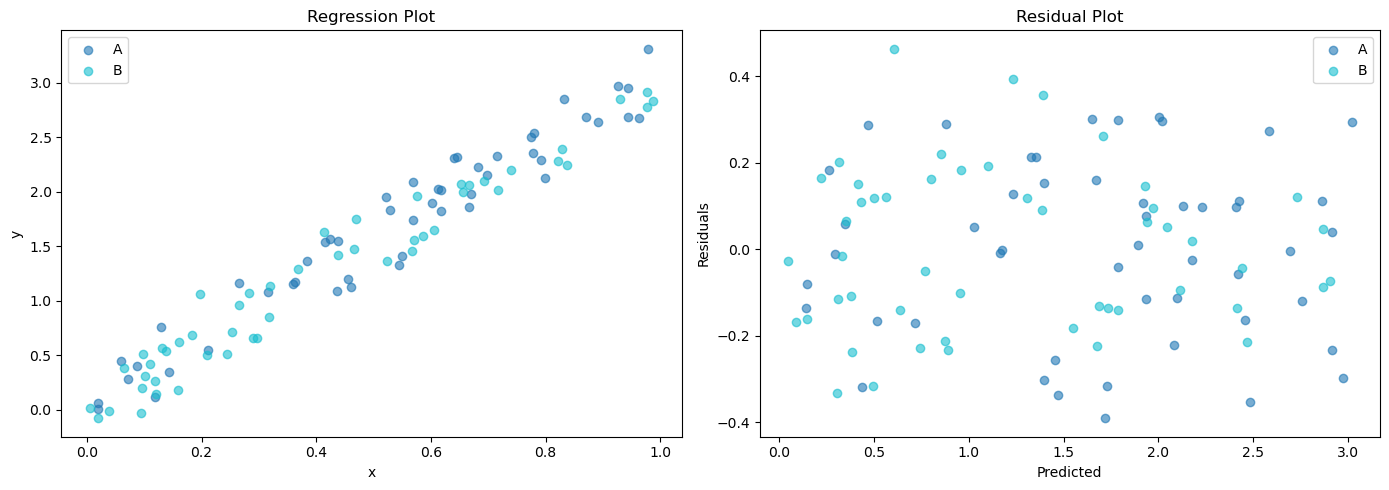

In [32]:
# 6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

from matplotlib.colors import to_rgba
import matplotlib.cm as cm

def reg_resid_plots(x, y, group=None):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    if group is None:
        group = ['All'] * len(x)

    unique_groups = list(pd.Series(group).unique())
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_groups)))  # Using a matplotlib colormap

    for i, grp in enumerate(unique_groups):
        mask = (pd.Series(group) == grp)
        x_vals = x[mask]
        y_vals = y[mask]

        # Regression plot
        axs[0].scatter(x_vals, y_vals, color=colors[i], label=str(grp), alpha=0.6)

        # Fit OLS model
        X_sm = sm.add_constant(x_vals)
        model = sm.OLS(y_vals, X_sm).fit()
        pred_vals = model.predict(X_sm)

        # Residual plot
        axs[1].scatter(pred_vals, model.resid, color=colors[i], label=str(grp), alpha=0.6)

    # Set titles and labels
    axs[0].set_title('Regression Plot')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    axs[1].set_title('Residual Plot')
    axs[1].set_xlabel('Predicted')
    axs[1].set_ylabel('Residuals')
    
    # Display legends
    for ax in axs:
        ax.legend()

    plt.tight_layout()
    plt.show()

# Random test data
np.random.seed(0)
x = pd.Series(np.random.rand(100))
y = 3 * x + np.random.normal(0, 0.2, size=100)
group = ['A' if i < 50 else 'B' for i in range(100)]

# Call the function
reg_resid_plots(x, y, group)

## Conclusion

 I have learned how to apply data visualization techniques using matplotlib and seaborn to analyze and interpret stock and earthquake data. By creating various plots, such as scatter plots, line plots, residual plots, and box plots, I gained insights into the relationships between variables, such as Facebook's stock prices and earthquake magnitudes. I also explored the impact of different events on stock prices and used colormaps to distinguish between groups in my visualizations. I applied regression techniques to model and analyze relationships within the data, along with residual analysis to assess the accuracy of these models. 